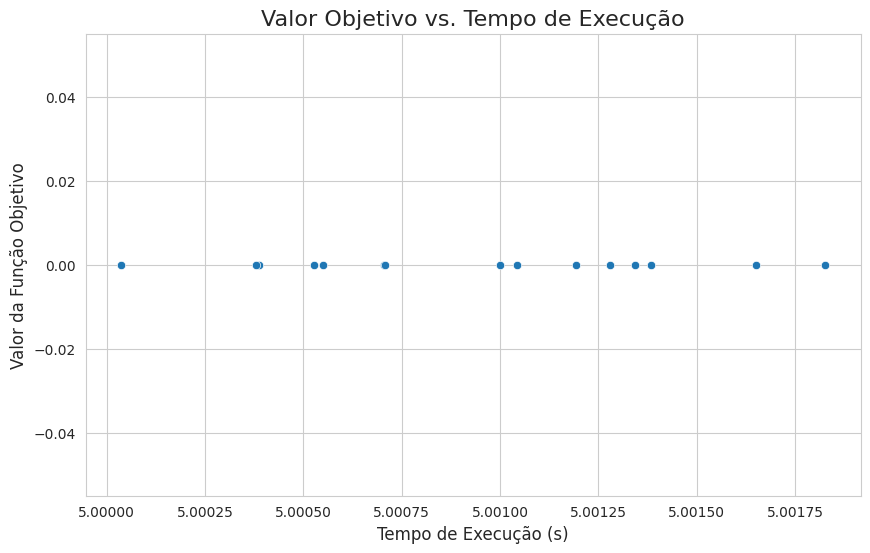

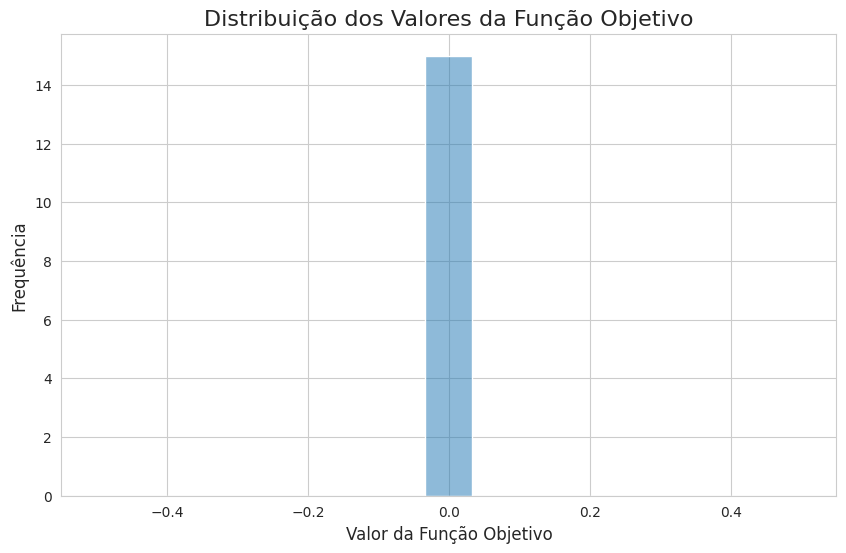

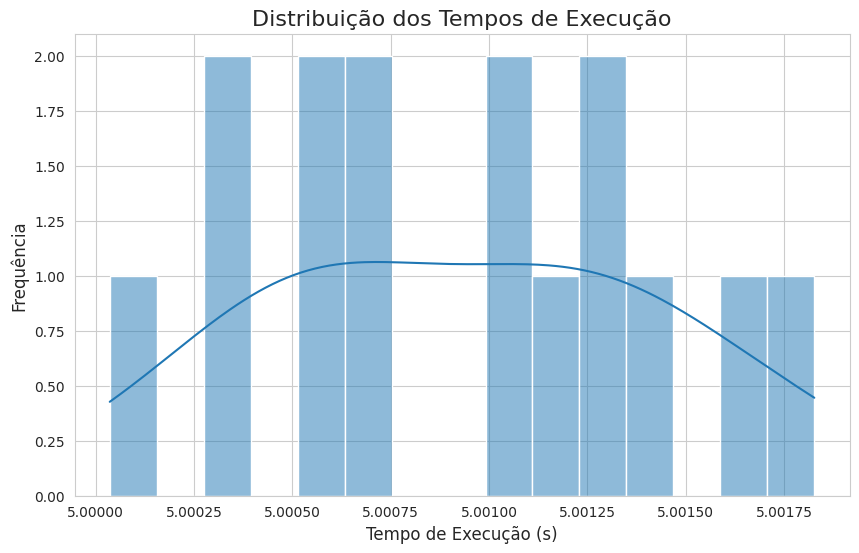

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configurações Iniciais ---
# Substitua 'output' pelo nome da sua pasta de saída, se for diferente
output_folder = 'output'
objectives_file = os.path.join(output_folder, 'objectives_brkga.txt')

# --- Análise e Visualização dos Dados ---
try:
    # O arquivo objectives_brkga.txt é gerado no modo 'a' (append),
    # então pode conter múltiplas linhas de cabeçalho se o código foi executado várias vezes.
    # Vamos ler o arquivo e tratar isso.
    with open(objectives_file, 'r') as f:
        lines = f.readlines()

    # O arquivo objectives_brkga.txt não tem cabeçalho, então definimos um
    df = pd.read_csv(objectives_file, sep=' ', header=None, names=['objective_value', 'execution_time'])

    # print("Dados brutos do arquivo objectives_brkga.txt:")
    # print(df.head())
    # print("\n--- Estatísticas Descritivas ---")
    # print(df.describe())

    # --- Gerando Gráficos ---
    sns.set_style("whitegrid")
    
    # Gráfico de Dispersão: Tempo de Execução vs. Valor da Função Objetivo
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='execution_time', y='objective_value', data=df)
    plt.title('Valor Objetivo vs. Tempo de Execução', fontsize=16)
    plt.xlabel('Tempo de Execução (s)', fontsize=12)
    plt.ylabel('Valor da Função Objetivo', fontsize=12)
    plt.show()

    # Histograma do Valor da Função Objetivo
    plt.figure(figsize=(10, 6))
    sns.histplot(df['objective_value'], bins=15, kde=True)
    plt.title('Distribuição dos Valores da Função Objetivo', fontsize=16)
    plt.xlabel('Valor da Função Objetivo', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.show()

    # Histograma do Tempo de Execução
    plt.figure(figsize=(10, 6))
    sns.histplot(df['execution_time'], bins=15, kde=True)
    plt.title('Distribuição dos Tempos de Execução', fontsize=16)
    plt.xlabel('Tempo de Execução (s)', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.show()

    # --- Análise por Instância (Assumindo que cada linha é uma instância) ---
    # Para uma análise mais detalhada, é útil agrupar os resultados
    # Se você tiver 10 instâncias e rodar o código 3 vezes para cada,
    # este código irá tratá-las como 30 execuções separadas.
    # Para identificar instâncias, você precisaria de uma coluna adicional no arquivo de saída.

except FileNotFoundError:
    print(f"Erro: O arquivo {objectives_file} não foi encontrado. Certifique-se de que o código C++ foi executado e gerou a pasta 'output' com o arquivo objectives_brkga.txt.")
except Exception as e:
    print(f"Ocorreu um erro ao processar o arquivo: {e}")